# 获取数据
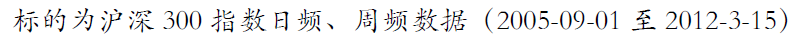

In [1]:
import  configparser
config = configparser.ConfigParser()
config.read('../config.ini')
token = config.get('tushare', 'token')

import tushare as ts
ts.set_token(token)

In [2]:
origin_daily_300 = ts.pro_bar(ts_code='000300.SH', asset='I').sort_values('trade_date').reset_index()
daily_300 = origin_daily_300.copy()
daily_300

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,4150,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06
1,4149,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06
2,4148,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
3,4147,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
4,4146,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
4146,4,000300.SH,20220124,4786.7377,4753.9413,4801.0976,4746.4479,4779.3142,7.4235,0.1553,1.144639e+08,2.462616e+08
4147,3,000300.SH,20220125,4678.4511,4761.9500,4781.3908,4678.2472,4786.7377,-108.2866,-2.2622,1.336676e+08,2.505558e+08
4148,2,000300.SH,20220126,4712.3109,4697.0991,4718.9946,4648.1283,4678.4511,33.8598,0.7237,1.070708e+08,2.265534e+08
4149,1,000300.SH,20220127,4619.8765,4708.0989,4708.4364,4616.0273,4712.3109,-92.4344,-1.9616,1.212638e+08,2.505357e+08


# 计算指标

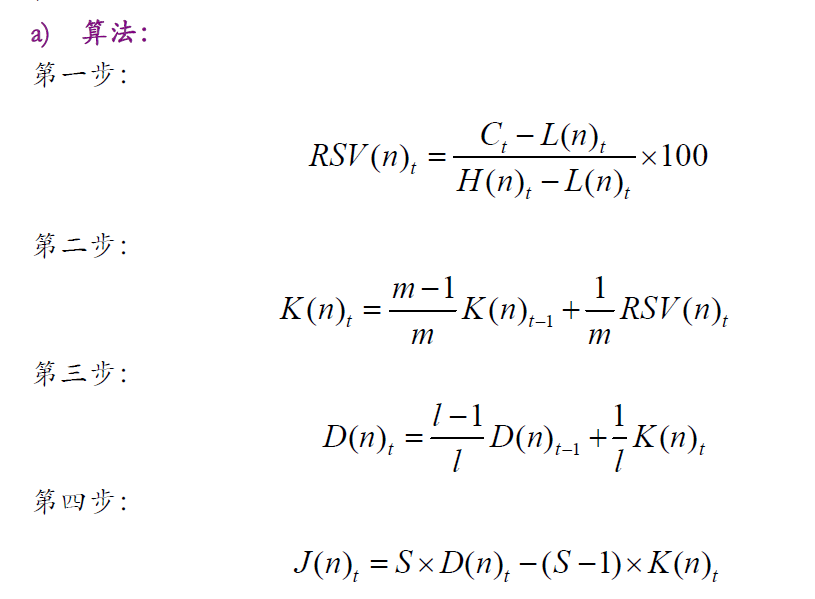

In [3]:
import numpy as np
import pandas as pd

In [4]:
def calc_kdj(mkt_data, n=14, m=3, l=3, S=3):
    close = mkt_data['close']
    low = mkt_data['low']
    high = mkt_data['high']
    rolling_low = low.rolling(n)
    rolling_high = high.rolling(n)
    """ 指标计算 """
    RSV = (close - rolling_low.min()) / (rolling_high.max() - rolling_low.min()) * 100
    #  k(t) = (m-1)/m * k(t-1) + 1/m * rsv(t) 
    K = RSV.fillna(100).ewm(com=m-1, adjust=False, min_periods=n).mean()
    #  d(t) = (l-1)/l * d(t-1) + 1/l * k(t) 
    D = K.fillna(100).ewm(com=l-1, adjust=False, min_periods=n).mean()
    J = S*D - (S-1)*K
    """ 赋值 """
    mkt_data['RSV'] = RSV
    mkt_data['K'] = K
    mkt_data['D'] = D
    mkt_data['J'] = J
    return mkt_data

In [5]:
daily_300 = calc_kdj(daily_300, 14, 3, 3, 3)
daily_300

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,RSV,K,D,J
0,4150,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,NaN,NaN,NaN,NaN
1,4149,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,NaN,NaN,NaN,NaN
2,4148,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,NaN,NaN,NaN,NaN
3,4147,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,NaN,NaN,NaN,NaN
4,4146,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,4,000300.SH,20220124,4786.7377,4753.9413,4801.0976,4746.4479,4779.3142,7.4235,0.1553,1.144639e+08,2.462616e+08,32.647965,28.882578,25.597436,19.027154
4147,3,000300.SH,20220125,4678.4511,4761.9500,4781.3908,4678.2472,4786.7377,-108.2866,-2.2622,1.336676e+08,2.505558e+08,0.113712,19.292956,23.495943,31.901917
4148,2,000300.SH,20220126,4712.3109,4697.0991,4718.9946,4648.1283,4678.4511,33.8598,0.7237,1.070708e+08,2.265534e+08,30.779493,23.121802,23.371229,23.870084
4149,1,000300.SH,20220127,4619.8765,4708.0989,4708.4364,4616.0273,4712.3109,-92.4344,-1.9616,1.212638e+08,2.505357e+08,1.623889,15.955831,20.899430,30.786627


In [16]:
daily_300[10:30]

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,RSV,K,D,J,signal
10,4140,000300.SH,20050118,974.689,967.374,974.872,960.293,967.452,7.237,0.7480,7311847.82,4.117944e+06,NaN,NaN,NaN,NaN,NaN
11,4139,000300.SH,20050119,967.210,974.333,974.333,965.258,974.689,-7.479,-0.7673,6338091.19,3.427951e+06,NaN,NaN,NaN,NaN,NaN
12,4138,000300.SH,20050120,956.245,963.213,963.213,952.230,967.210,-10.965,-1.1337,7727106.70,4.399351e+06,NaN,NaN,NaN,NaN,NaN
13,4137,000300.SH,20050121,982.604,954.462,984.274,943.439,956.245,26.359,2.7565,14450059.85,8.152086e+06,62.142993,87.380998,95.793666,112.619002,NaN
14,4136,000300.SH,20050124,998.133,1001.854,1001.854,986.239,982.604,15.529,1.5804,14359461.61,8.360161e+06,86.782813,87.181603,92.922978,104.405729,NaN
15,4135,000300.SH,20050125,997.775,995.637,997.951,985.237,998.133,-0.358,-0.0359,9862529.11,6.157022e+06,86.214775,86.859327,90.901761,98.986629,NaN
16,4134,000300.SH,20050126,989.928,995.780,999.474,988.475,997.775,-7.847,-0.7864,7663290.17,4.719440e+06,73.763963,82.494206,88.099243,99.309317,NaN
17,4133,000300.SH,20050127,974.631,987.342,987.702,973.771,989.928,-15.297,-1.5453,6945364.97,4.094399e+06,49.492257,71.493556,82.564014,104.704929,NaN
18,4132,000300.SH,20050128,969.209,974.631,975.624,965.209,974.631,-5.422,-0.5563,5748807.38,3.280950e+06,40.889185,61.292099,75.473376,103.835928,-1.0
19,4131,000300.SH,20050131,954.879,965.785,965.785,953.142,969.209,-14.330,-1.4785,6788706.43,3.863574e+06,18.151815,46.912004,65.952918,104.034747,NaN


# 原始策略

## 计算信号
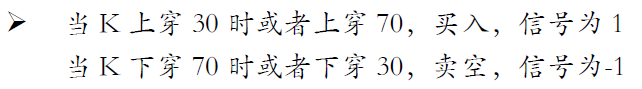

In [6]:
def calc_signal(mkt_data):
    K = mkt_data['K']
    """ 计算signls """
    signals = []
    for pre_k, k in zip(K.shift(1), K):
        signal = None
        if pre_k<30 and k>=30:   # K上穿30 
            signal = 1
        elif pre_k>=30 and k<30: # K下穿30 
            signal =  -1
        elif pre_k<70 and k>=70: # K上穿70 
            signal = 1 
        elif pre_k>=70 and k<70: # K下穿70 
            signal = -1
        signals.append(signal)
    """ signal赋值 """
    mkt_data['signal'] = signals
    return mkt_data

In [7]:
daily_300 = calc_signal(daily_300)
daily_300

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,RSV,K,D,J,signal
0,4150,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,NaN,NaN,NaN,NaN,NaN
1,4149,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,NaN,NaN,NaN,NaN,NaN
2,4148,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,NaN,NaN,NaN,NaN,NaN
3,4147,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,NaN,NaN,NaN,NaN,NaN
4,4146,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,4,000300.SH,20220124,4786.7377,4753.9413,4801.0976,4746.4479,4779.3142,7.4235,0.1553,1.144639e+08,2.462616e+08,32.647965,28.882578,25.597436,19.027154,NaN
4147,3,000300.SH,20220125,4678.4511,4761.9500,4781.3908,4678.2472,4786.7377,-108.2866,-2.2622,1.336676e+08,2.505558e+08,0.113712,19.292956,23.495943,31.901917,NaN
4148,2,000300.SH,20220126,4712.3109,4697.0991,4718.9946,4648.1283,4678.4511,33.8598,0.7237,1.070708e+08,2.265534e+08,30.779493,23.121802,23.371229,23.870084,NaN
4149,1,000300.SH,20220127,4619.8765,4708.0989,4708.4364,4616.0273,4712.3109,-92.4344,-1.9616,1.212638e+08,2.505357e+08,1.623889,15.955831,20.899430,30.786627,NaN


In [8]:
daily_300[daily_300['signal'].isin([1,-1])]

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,RSV,K,D,J,signal
18,4132,000300.SH,20050128,969.2090,974.6310,975.6240,965.2090,974.6310,-5.4220,-0.5563,5.748807e+06,3.280950e+06,40.889185,61.292099,75.473376,103.835928,-1.0
23,4127,000300.SH,20050204,1016.8580,992.2500,1021.0250,989.9390,993.2150,23.6430,2.3805,1.573621e+07,9.549871e+06,94.629186,73.215613,63.745476,44.805200,1.0
35,4115,000300.SH,20050303,1027.7100,1019.8760,1028.4020,1014.7520,1021.3200,6.3900,0.6257,9.203086e+06,5.582812e+06,54.312378,69.549489,78.747747,97.144263,-1.0
44,4106,000300.SH,20050316,1003.0650,1011.8500,1012.1980,995.9670,1013.5230,-10.4580,-1.0318,1.062278e+07,7.153746e+06,11.175137,23.757904,38.091412,66.758429,-1.0
58,4092,000300.SH,20050405,955.5980,960.5400,967.7460,953.5860,962.1680,-6.5700,-0.6828,9.534537e+06,6.069514e+06,35.644432,30.575784,22.411728,6.083617,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,48,000300.SH,20211122,4912.3990,4895.3875,4918.9957,4893.2732,4890.0575,22.3415,0.4569,1.380928e+08,3.161488e+08,96.001995,78.365548,66.639400,43.187104,1.0
4107,43,000300.SH,20211129,4851.4230,4820.0053,4858.5322,4818.7058,4860.1265,-8.7035,-0.1791,1.336269e+08,2.859952e+08,53.681032,67.734008,74.110272,86.862801,-1.0
4114,36,000300.SH,20211208,4995.9298,4934.4056,4995.9298,4915.7898,4922.1015,73.8283,1.4999,1.574906e+08,3.290648e+08,100.000000,76.310272,63.394087,37.561716,1.0
4121,29,000300.SH,20211217,4954.7599,5021.3385,5022.1067,4954.7592,5034.7321,-79.9722,-1.5884,1.490054e+08,2.979433e+08,43.324717,61.155519,69.146557,85.128631,-1.0


In [10]:
daily_300[17:25]

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,RSV,K,D,J,signal
17,4133,000300.SH,20050127,974.631,987.342,987.702,973.771,989.928,-15.297,-1.5453,6945364.97,4.094399e+06,49.492257,71.493556,82.564014,104.704929,NaN
18,4132,000300.SH,20050128,969.209,974.631,975.624,965.209,974.631,-5.422,-0.5563,5748807.38,3.280950e+06,40.889185,61.292099,75.473376,103.835928,-1.0
19,4131,000300.SH,20050131,954.879,965.785,965.785,953.142,969.209,-14.330,-1.4785,6788706.43,3.863574e+06,18.151815,46.912004,65.952918,104.034747,NaN
20,4130,000300.SH,20050201,955.951,953.330,965.477,952.741,954.879,1.072,0.1123,7433066.76,4.275707e+06,19.852755,37.892254,56.599364,94.013583,NaN
21,4129,000300.SH,20050202,1006.913,956.701,1006.932,956.701,955.951,50.962,5.3310,17057338.57,1.020290e+07,99.970075,58.584861,57.261196,54.613866,NaN
22,4128,000300.SH,20050203,993.215,1005.563,1014.187,992.155,1006.913,-13.698,-1.3604,16974539.33,1.005731e+07,70.356759,62.508827,59.010407,52.013565,NaN
23,4127,000300.SH,20050204,1016.858,992.250,1021.025,989.939,993.215,23.643,2.3805,15736214.61,9.549871e+06,94.629186,73.215613,63.745476,44.805200,1.0
24,4126,000300.SH,20050216,1023.584,1023.324,1033.248,1018.487,1016.858,6.726,0.6614,12131293.05,7.438168e+06,89.239386,78.556871,68.682607,48.934080,NaN


## 计算持仓

In [70]:
def calc_position(mkt_data):
    mkt_data['signal_last'] = mkt_data['signal'].shift(1)
    mkt_data['position'] = mkt_data['signal'].fillna(method='ffill').shift(1).fillna(0)
    return mkt_data

In [71]:
daily_300 = calc_position(daily_300)
daily_300

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,...,signal,signal_last,position,hold_r,cumu_hold_nv,hold_win,hold_cumu_r,drawdown,ex_hold_r,trade_datetime
0,4146,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,...,NaN,NaN,0.0,-0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-04
1,4145,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,...,NaN,NaN,0.0,0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-05
2,4144,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,...,NaN,NaN,0.0,-0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-06
3,4143,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,...,NaN,NaN,0.0,0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-07
4,4142,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,...,NaN,NaN,0.0,0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,4,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,...,NaN,NaN,-1.0,-0.009664,9.281772,False,15.702437,0.320941,-0.009784,2022-01-18
4143,3,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,...,NaN,NaN,-1.0,0.006849,9.345343,True,15.816832,0.316290,0.006729,2022-01-19
4144,2,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,...,NaN,NaN,-1.0,-0.009022,9.261029,False,15.665110,0.322458,-0.009142,2022-01-20
4145,1,000300.SH,20220121,4779.3142,4808.7733,4818.3052,4762.5641,4823.5091,-44.1949,-0.9162,...,NaN,NaN,-1.0,-0.009162,9.345879,False,15.512424,0.328666,-0.009282,2022-01-21


## 结果量化

In [72]:
def statistic_performance(mkt_data, r0=0.03, data_period=1440):
    position = mkt_data['position']
    
    """      序列型特征 
        hold_r :      持仓收益
        hold_win :    持仓胜负
        hold_cumu_r : 累计持仓收益
        drawdown :    回撤
        ex_hold_r :   超额收益
    """
    hold_r = mkt_data['pct_chg']/100 * position
    hold_win = hold_r>0
    hold_cumu_r = (1+hold_r).cumprod() - 1
    drawdown = (hold_cumu_r.cummax()-hold_cumu_r)/(1+hold_cumu_r).cummax()    
    ex_hold_r= hold_r-r0/(250*1440/data_period)

    mkt_data['hold_r'] = hold_r
    mkt_data['hold_win'] = hold_win
    mkt_data['hold_cumu_r'] = hold_cumu_r
    mkt_data['drawdown'] = drawdown
    mkt_data['ex_hold_r'] = ex_hold_r
    
    """       数值型特征 
        v_hold_cumu_r：         累计持仓收益
        v_pos_hold_times：      多仓开仓次数
        v_pos_hold_win_times：  多仓开仓盈利次数
        v_pos_hold_period：     多仓持有周期数
        v_pos_hold_win_period： 多仓持有盈利周期数
        v_neg_hold_times：      空仓开仓次数
        v_neg_hold_win_times：  空仓开仓盈利次数
        v_neg_hold_period：     空仓持有盈利周期数
        v_neg_hold_win_period： 空仓开仓次数
        v_hold_period：         持仓周期数（最后一笔未平仓订单也算）
        v_hold_win_period：     持仓盈利周期数（最后一笔未平仓订单也算）
        v_max_dd：              最大回撤
        v_annual_std：          年化标准差
        v_annual_ret：          年化收益
        v_sharpe：              夏普率
    """
    v_hold_cumu_r = hold_cumu_r.tolist()[-1]

    v_pos_hold_times= 0 
    v_pos_hold_win_times = 0
    v_pos_hold_period = 0
    v_pos_hold_win_period = 0
    v_neg_hold_times= 0 
    v_neg_hold_win_times = 0
    v_neg_hold_period = 0
    v_neg_hold_win_period = 0
    for w, r, pre_pos, pos in zip(hold_win, hold_r, position.shift(1), position):
        # 有换仓（先结算上一次持仓，再初始化本次持仓）
        if pre_pos!=pos: 
            # 判断pre_pos非空：若为空则是循环的第一次，此时无需结算，直接初始化持仓即可
            if pre_pos == pre_pos:
                # 结算上一次持仓
                if pre_pos>0:
                    v_pos_hold_times += 1
                    v_pos_hold_period += tmp_hold_period
                    v_pos_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:
                        v_pos_hold_win_times+=1
                elif pre_pos<0:
                    v_neg_hold_times += 1      
                    v_neg_hold_period += tmp_hold_period
                    v_neg_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:                    
                        v_neg_hold_win_times+=1
            # 初始化本次持仓
            tmp_hold_r = r
            tmp_hold_period = 0
            tmp_hold_win_period = 0
        else: # 未换仓
            if abs(pos)>0:
                tmp_hold_period += 1
                if r>0:
                    tmp_hold_win_period += 1
                if abs(r)>0:
                    tmp_hold_r = (1+tmp_hold_r)*(1+r)-1       

    v_hold_period = (abs(position)>0).sum()
    v_hold_win_period = (hold_r>0).sum()
    v_max_dd = drawdown.max()    
    v_annual_ret = pow( 1+v_hold_cumu_r, 
                      1/(data_period/1440*len(mkt_data)/250) )-1
    v_annual_std = ex_hold_r.std() * np.sqrt(250*1440/data_period) 
    v_sharpe= v_annual_ret / v_annual_std

    """ 生成Performance DataFrame """
    performance_cols = ['累计收益', 
                        '多仓次数', '多仓胜率', '多仓平均持有期', 
                        '空仓次数', '空仓胜率', '空仓平均持有期', 
                        '日胜率', '最大回撤', '年化收益/最大回撤',
                        '年化收益', '年化标准差', '年化夏普'
                       ]
    performance_values = ['{:.2%}'.format(v_hold_cumu_r),
                          v_pos_hold_times, '{:.2%}'.format(v_pos_hold_win_times/v_pos_hold_times), 
                                            '{:.2f}'.format(v_pos_hold_period/v_pos_hold_times),
                          v_neg_hold_times, '{:.2%}'.format(v_neg_hold_win_times/v_neg_hold_times), 
                                            '{:.2f}'.format(v_neg_hold_period/v_neg_hold_times),
                          '{:.2%}'.format(v_hold_win_period/v_hold_period), 
                          '{:.2%}'.format(v_max_dd), 
                          '{:.2f}'.format(v_annual_ret/v_max_dd),
                          '{:.2%}'.format(v_annual_ret), 
                          '{:.2%}'.format(v_annual_std), 
                          '{:.2f}'.format(v_sharpe)
                         ]
    performance_df = pd.DataFrame(performance_values, index=performance_cols)
    
    return mkt_data, performance_df

In [73]:
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
print(performance_df)

                 0
累计收益       692.16%
多仓次数            59
多仓胜率        45.76%
多仓平均持有期      15.07
空仓次数            59
空仓胜率        40.68%
空仓平均持有期       9.83
日胜率         55.67%
最大回撤        29.32%
年化收益/最大回撤     1.31
年化收益        38.52%
年化标准差       31.71%
年化夏普          1.21


<ipython-input-72-277b46947615>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-72-277b46947615>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-72-277b46947615>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

## 结果可视化

In [74]:
import datetime
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, row, gridplot, layout
from bokeh.models import Span
output_notebook()

Loading BokehJS ...

In [75]:
def visualize_performance(mkt_data):
    mkt_data['trade_datetime'] = mkt_data['trade_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))
    dt = mkt_data['trade_datetime']

    f1 = figure(height=300, width=700, sizing_mode='stretch_width', 
                title='Target Trend',
                x_axis_type='datetime',
                x_axis_label="trade_datetime", y_axis_label="close")
    f2 = figure(height=200, sizing_mode='stretch_width', 
                title='Position',
                x_axis_label="trade_datetime", y_axis_label="position",
                x_axis_type='datetime',
                x_range=f1.x_range)
    f3 = figure(height=200, sizing_mode='stretch_width', 
                title='Return',
                x_axis_type='datetime',
                x_range=f1.x_range)
    f4 = figure(height=200, sizing_mode='stretch_width', 
                title='Drawdown',
                x_axis_type='datetime',
                x_range=f1.x_range)

    indi = figure(height=200, sizing_mode='stretch_width', 
                  title='KDJ',
                  x_axis_type='datetime',
                  x_range=f1.x_range
                 )

    # 绘制行情
    close = mkt_data['close']
    cumu_hold_close = (mkt_data['hold_cumu_r']+1) * close.tolist()[0]
    f1.line(dt, close, line_width=1)
    f1.line(dt, cumu_hold_close, line_width=1, color='red')

    signal = mkt_data['signal']
    # for d, sig in zip(dt, signal):
    #     sig_l = Span(location=d, dimension='height', line_color='#009E73', line_dash='dashed', line_width=3)
    #     f1.add_layout(sig_l)

    # 绘制指标
    K, D, J = mkt_data['K'], mkt_data['D'], mkt_data['J']
    indi.line(dt, K, line_width=1, color='red')
    indi.line(dt, D, line_width=1, color='blue')
    indi.line(dt, J, line_width=1, color='green')

    # 绘制仓位
    position = mkt_data['position']
    f2.step(dt, position)

    # 绘制收益
    hold_r = mkt_data['hold_r']
    f3.vbar(x=dt, top=hold_r)

    # 绘制回撤
    drawdown = mkt_data['drawdown']
    f4.line(dt, -drawdown, line_width=1)

    #p = column(f1,f2,f3,f4)
    p = gridplot([ [f1],
                   [indi],
                   [f2], 
                   [f3],
                   [f4]
                 ])
    show(p)

## 整体执行

In [76]:
daily_300 = calc_signal(daily_300)
daily_300 = calc_position(daily_300)
daily_300

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,...,signal,signal_last,position,hold_r,cumu_hold_nv,hold_win,hold_cumu_r,drawdown,ex_hold_r,trade_datetime
0,4146,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,...,NaN,NaN,0.0,-0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-04
1,4145,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,...,NaN,NaN,0.0,0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-05
2,4144,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,...,NaN,NaN,0.0,-0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-06
3,4143,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,...,NaN,NaN,0.0,0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-07
4,4142,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,...,NaN,NaN,0.0,0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,4,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,...,NaN,NaN,-1.0,-0.009664,9.281772,False,15.702437,0.320941,-0.009784,2022-01-18
4143,3,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,...,NaN,NaN,-1.0,0.006849,9.345343,True,15.816832,0.316290,0.006729,2022-01-19
4144,2,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,...,NaN,NaN,-1.0,-0.009022,9.261029,False,15.665110,0.322458,-0.009142,2022-01-20
4145,1,000300.SH,20220121,4779.3142,4808.7733,4818.3052,4762.5641,4823.5091,-44.1949,-0.9162,...,NaN,NaN,-1.0,-0.009162,9.345879,False,15.512424,0.328666,-0.009282,2022-01-21


In [77]:
""" 截取需要数据 """
#result_daily_300, performance_df = statistic_performance(daily_300)
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])
""" 评价和展示 """
print(performance_df)
visualize_performance(result_daily_300)

<ipython-input-72-277b46947615>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-72-277b46947615>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-72-277b46947615>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                 0
累计收益       692.16%
多仓次数            59
多仓胜率        45.76%
多仓平均持有期      15.07
空仓次数            59
空仓胜率        40.68%
空仓平均持有期       9.83
日胜率         55.67%
最大回撤        29.32%
年化收益/最大回撤     1.31
年化收益        38.52%
年化标准差       31.71%
年化夏普          1.21


## 参数稳定性：滚动优化best_N

In [16]:
def get_rolling_best_N(mkt_data, default_n=14, alternative_ns=[10,11,12,13,14], choice_period=125):
    """ 生成一个dict，存放所有参数下生成的mkt_data """
    alternative_dict = {}
    for n in alternative_ns:
        mkt_data = calc_kdj(mkt_data, n, m=3, l=3, S=3)
        mkt_data = calc_signal(mkt_data)
        mkt_data = calc_position(mkt_data)
        mkt_data['hold_r'] = mkt_data['position'] * mkt_data['pct_chg']/100
        mkt_data['cumu_hold_nv'] = (1+mkt_data['hold_r']).cumprod()
        alternative_dict[n] = mkt_data.copy()
    """ 从choice_period + default_n开始，选择前choice_period期表现最好的策略的signal """
    cumu_hold_nv_df = pd.concat([alternative_dict[n][['cumu_hold_nv']] for n in alternative_ns], 
                                axis=1)
    cumu_hold_nv_df.columns=alternative_ns
    position_df = pd.concat([alternative_dict[n][['position']] for n in alternative_ns], 
                            axis=1)
    position_df.columns=alternative_ns
    
    best_Ns = [default_n] * len(mkt_data)
    best_positions = position_df[default_n].tolist()
    for idx in range(len(mkt_data)-choice_period-1):
        """取 idx - idx+choice_period 共 choice_period条数据"""
        tmp_cumu_hold_nv_df = cumu_hold_nv_df[idx:idx+choice_period]
        """比较不同n下的 hold_cumu_r/max_dd 的值"""
        tmp_comp_res = pd.DataFrame([[tmp_cumu_hold_nv_df[n].values[-1]/tmp_cumu_hold_nv_df[n].values[0]-1 for n in alternative_ns],
                                     [(1-tmp_cumu_hold_nv_df[n]/tmp_cumu_hold_nv_df[n].cummax()).max() for n in alternative_ns]
                                    ],
                                     columns=alternative_ns, 
                                     index=['hold_cumu_r', 'max_dd']).T
        tmp_comp_res['value'] = tmp_comp_res['hold_cumu_r']/tmp_comp_res['max_dd']
        """选取hold_cumu_r/max_dd最大的参数作为当期best_N，并将其下期的position作为下期的best_pos"""
        best_N = tmp_comp_res.sort_values(by='value', ascending=False).index[0]
        best_pos = position_df[best_N][idx+choice_period]
        best_Ns[idx+choice_period-1] = best_N
        best_positions[idx+choice_period] = best_pos
    best_Ns = pd.Series(best_Ns, index=mkt_data['trade_date']) 
    best_positions = pd.Series(best_positions, index=mkt_data['trade_date']) 
    return best_Ns, best_positions   

In [17]:
best_Ns, best_positions = get_rolling_best_N( daily_300, 
                                              default_n=14, 
                                              alternative_ns=[10,11,12,13,14], 
                                              choice_period=125)
print(best_Ns.value_counts())
daily_300['position'] = best_positions.values

14    1518
10     945
12     631
13     563
11     490
dtype: int64


In [18]:
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-10-277b46947615>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-10-277b46947615>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-10-277b46947615>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                 0
累计收益       -36.67%
多仓次数           139
多仓胜率        38.85%
多仓平均持有期       8.55
空仓次数           139
空仓胜率        30.94%
空仓平均持有期       6.71
日胜率         48.96%
最大回撤        55.38%
年化收益/最大回撤    -0.08
年化收益        -4.65%
年化标准差       22.52%
年化夏普         -0.21


# 策略优化
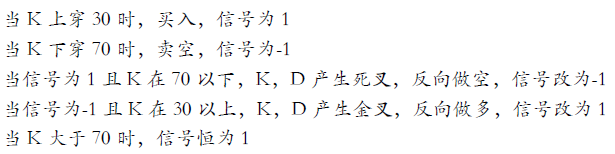

## 计算新信号 & 计算持仓

In [78]:
def calc_signal(mkt_data):
    atmos = 0
    signals = []
    for k, d, pre_k, pre_d in zip(mkt_data['K'],mkt_data['D'], mkt_data['K'].shift(1), mkt_data['D'].shift(1)):
        signal = None
        k_up_30 = (pre_k<30) & (k>=30)
        k_down_70 = (pre_k>=70) & (k<70)
        k_gold_x = (k>=d) & (pre_k<pre_d)
        k_dead_x = (k<d) & (pre_k>=pre_d)
        if k_up_30:  # K上穿30, 买入，信号为1
            signal = 1;  atmos = 1
        elif k_down_70: # K下穿70, 卖出, 信号为-1
            signal = -1;  atmos = -1
        if atmos == 1:  # 信号为1
            if pre_k<70 and k_dead_x:  # K在70以下，KD发生死叉
                signal = -1; atmos = -1
        elif atmos == -1:  # 信号为-1
            if pre_k>=30 and k_gold_x: # K在30以上，KD发生金叉
                signal = 1; atmos = 1        
        elif k>=70: # K>70，信号恒为1
            atmos = 1    
        signals.append(signal)
    mkt_data['signal'] = signals
    return mkt_data

In [79]:
daily_300 = calc_signal(daily_300)
daily_300 = calc_position(daily_300)
daily_300

,index,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,...,signal,signal_last,position,hold_r,cumu_hold_nv,hold_win,hold_cumu_r,drawdown,ex_hold_r,trade_datetime
0,4146,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,...,NaN,NaN,0.0,-0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-04
1,4145,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,...,NaN,NaN,0.0,0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-05
2,4144,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,...,NaN,NaN,0.0,-0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-06
3,4143,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,...,NaN,NaN,0.0,0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-07
4,4142,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,...,NaN,NaN,0.0,0.000000,1.000000,False,0.000000,0.000000,-0.000120,2005-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,4,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,...,NaN,NaN,-1.0,-0.009664,9.281772,False,15.702437,0.320941,-0.009784,2022-01-18
4143,3,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,...,NaN,NaN,-1.0,0.006849,9.345343,True,15.816832,0.316290,0.006729,2022-01-19
4144,2,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,...,NaN,NaN,-1.0,-0.009022,9.261029,False,15.665110,0.322458,-0.009142,2022-01-20
4145,1,000300.SH,20220121,4779.3142,4808.7733,4818.3052,4762.5641,4823.5091,-44.1949,-0.9162,...,NaN,NaN,-1.0,-0.009162,9.345879,False,15.512424,0.328666,-0.009282,2022-01-21


## 结果量化 & 结果可视化

In [81]:
#result_daily_300, performance_df = statistic_performance(daily_300)
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-72-277b46947615>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-72-277b46947615>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-72-277b46947615>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                  0
累计收益       1387.56%
多仓次数             66
多仓胜率         45.45%
多仓平均持有期       13.32
空仓次数             66
空仓胜率         36.36%
空仓平均持有期        8.73
日胜率          56.74%
最大回撤         24.21%
年化收益/最大回撤      2.19
年化收益         52.96%
年化标准差        31.65%
年化夏普           1.67


## 参数稳定性

In [244]:
best_Ns, best_positions = get_rolling_best_N( daily_300, 
                                              default_n=14, 
                                              alternative_ns=[10,11,12,13,14], 
                                              choice_period=125)
print(best_Ns.value_counts())
daily_300['position'] = best_positions.values

14    1336
11     744
10     740
12     730
13     593
dtype: int64


In [245]:
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-232-925028fd6d41>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-232-925028fd6d41>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-232-925028fd6d41>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

                 0
累计收益       -18.11%
多仓次数           152
多仓胜率        38.82%
多仓平均持有期       7.80
空仓次数           152
空仓胜率        29.61%
空仓平均持有期       5.89
日胜率         48.91%
最大回撤        38.80%
年化收益/最大回撤    -0.05
年化收益        -2.06%
年化标准差       22.53%
年化夏普         -0.09
